In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

0.20.1
1.12.1
0.18.1


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

### Get Data

In [5]:
df = pd.read_csv("dataset/winemag-data_first150k.csv.zip")

In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [8]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


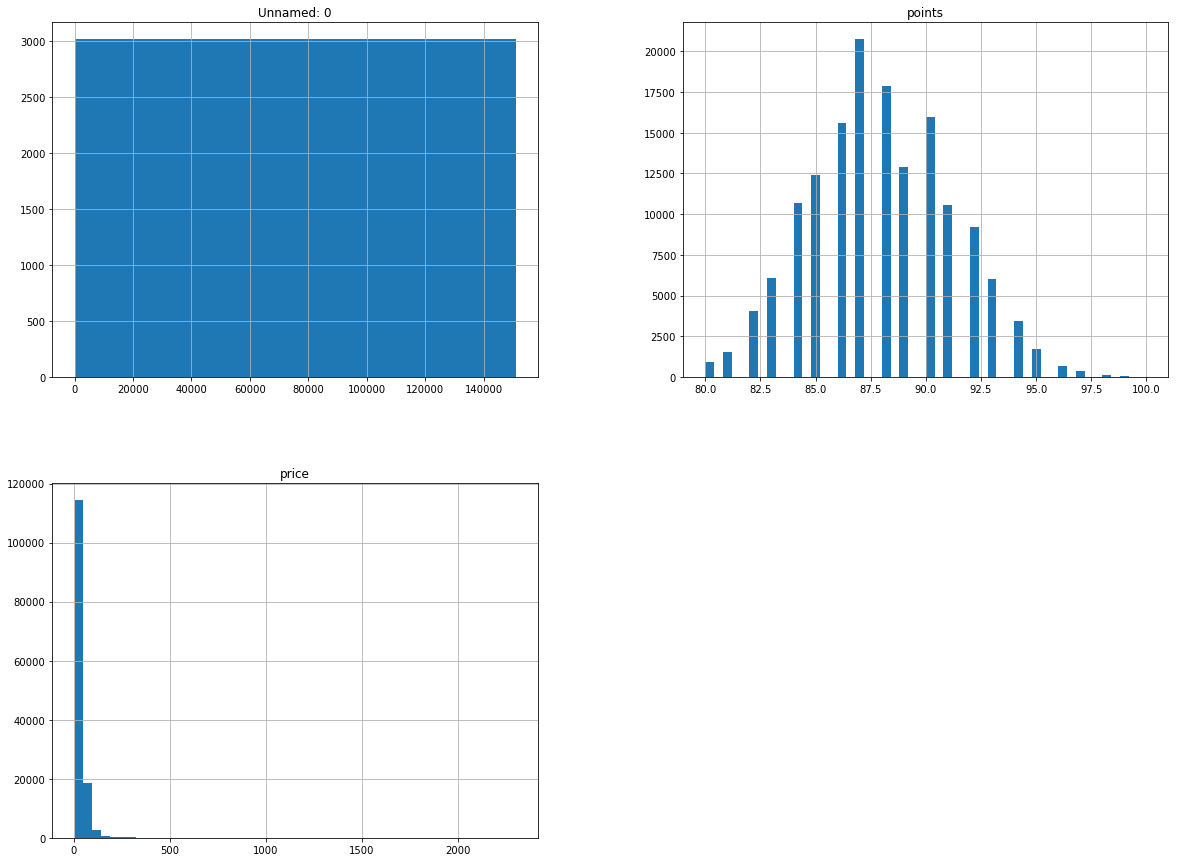

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

### Create a Test set

In [10]:
train_set, test_set = train_test_split(df, test_size=0.3)

In [11]:
print("train:", len(train_set))
print("test:", len(test_set))

train: 105651
test: 45279


In [12]:
df['points_cat'] = np.ceil(df['points']/10.0)

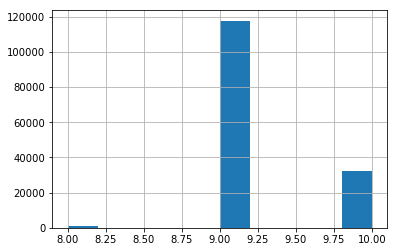

In [13]:
df['points_cat'].hist()

In [14]:
df['points_cat'].value_counts()

9.0     117795
10.0     32237
8.0        898
Name: points_cat, dtype: int64

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values


In [16]:
num_attributes = ["price"]
cat_attributes = ["country",]

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import FunctionTransformer

In [18]:
def drop_nan(X, y=None):
    df = pd.DataFrame(X)
    df.dropna(subset=["country"], inplace=True)
    return df

In [19]:
pre_pipeline = Pipeline([
    ("drop_nan", FunctionTransformer(drop_nan, validate=False))
])

In [20]:
wine_df = pre_pipeline.fit_transform(df)

In [21]:
points = wine_df.points

In [22]:
wine_df.drop('points', axis=1, inplace=True)

In [23]:
df.country.isnull().sum()

5

In [24]:
wine_df.country.isnull().sum()

0

In [25]:
wine_df.count(), len(points)

(Unnamed: 0     150925
 country        150925
 description    150925
 designation    105190
 price          137230
 province       150925
 region_1       125870
 region_2        60953
 variety        150925
 winery         150925
 points_cat     150925
 dtype: int64, 150925)

In [29]:
from sklearn.preprocessing import LabelBinarizer

In [26]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [32]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('encoder', LabelBinarizer()),
])

In [33]:
full_pipeline = Pipeline([
#    ('pre_pipeline', pre_pipeline),
    ('process_pipeline',FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline),
        ])),
])   

In [34]:
wine_prepared = full_pipeline.fit_transform(wine_df)

In [35]:
wine_prepared[:1]

array([[ 5.83552179,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ]])

In [36]:
len(wine_prepared), len(points)

(150925, 150925)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(wine_prepared, points, test_size=0.33, random_state=25)

In [38]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

101119 49806 101119 49806


In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### DecisionTreeRegressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
tree_reg = DecisionTreeRegressor(random_state=25)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=25,
           splitter='best')

In [42]:
wine_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.5479408989577261

In [43]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
wine_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, wine_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

2.9653511212040979

SVR took around 20 minutes to run

In [44]:
# trying linearSVR
from sklearn.svm import LinearSVR

svm_reg = LinearSVR()
svm_reg.fit(X_train, y_train)
wine_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, wine_predictions)
smv_rmse = np.sqrt(svm_mse)
smv_rmse

2.9720623451428909